**Gaussian Naive Bayes (GNB)** is a variant of Naive Bayes that follows Gaussian normal distribution and supports continous data. (GNB là một biến thể của NB và được dùng cho DL liên tục).

**Naive Bayes** are a group of supervised machine learning classification algorithms based on the Bayes theorem.\
It is a simple classification technique, but has high functionality.\
They find use when the dimensionality of the inputs is high.\
Complex classification problems can also be implemented by using **Naive Bayes Classifier**.

#### Bayes Theorem:

\begin{equation}
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)\cdot P(B|A)}{P(B)}
\end{equation}

#### Naive Bayes Classifier

Naive Bayes Classifiers are based on the Bayes Theorem.\
One assumption taken is the strong independence assumptions between the features. These classifiers assume that the value of a particular feature is independent of the value of any other feature.\
In a supervised learning situation, Naive Bayes Classifiers are trained very efficiently. Naive Bayed classifiers need a small training data to estimate the parameters needed for classification.\
Naive Bayes Classifiers have simple design and implementation and they can applied to many real life situations.

#### Gaussian Naive Bayes (GNB)

Mô hình này được sử dụng chủ yếu trong loại dữ liệu mà các thành phần (features) của (điểm) DL là các biến liên tục.

Với mỗi chiều dữ liệu (feature) thứ $i$ và một class $c$, $x_i$ tuân theo một phân phối chuẩn có kỳ vọng $\mu_{ci}$ và phương sai $\sigma_{ci}^2$: 

\begin{equation}
P(x_i|c) = p(x_i|\mu_{ci}, \sigma_{ci}^2) = \frac{1}{\sqrt{2\pi \sigma_{ci}^2}}\text{exp}\left(-\frac{(x_i - \mu_{ci})^2}{2\sigma_{ci}^2} \right)
\end{equation}

trong đó, bộ tham số $\theta = \{\mu_{ci}, \sigma_{ci}^2 \}$ được xác định bằng MLE: 

\begin{equation}
(\mu_{ci}, \sigma_{ci}^2) = \text{arg}\max_{\mu_{ci}, \sigma_{ci}^2} \prod_{n=1}^{N} p(x_{i}^{(n)}|\mu_{ci}, \sigma_{ci}^{2})
\end{equation}

Đây là cách tính của thư viện sklearn.

#### z-score (class A):

\begin{equation} 
\text{z-score} = \frac{x - \mu_A}{\sigma_A}
\end{equation} 

### Ví dụ:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline 

#### Import the data

In [3]:
data = pd.read_csv('suv_data.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

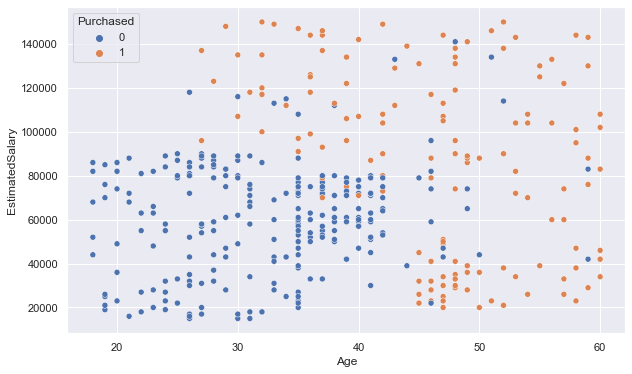

In [27]:
# scatter plot of age versus estimated salary featured by Purchased 
plt.figure(figsize = (10, 6))
sns.scatterplot('Age', 'EstimatedSalary', hue = 'Purchased', data = data)
plt.plot()

### 3. Arange data into feature matrix and target vector 

Để thực hiện GNB, ta sẽ chỉ quan tâm hai chiều DL của vector $\mathbf{x}$ là Age và EstimatedSalary (có thể có Gender???), tức $x_{Age}$ và $x_{EstimatedSalary}$.

Chú ý: Rõ ràng có thể nhận thấy là Age và EstimatedSalary là có tương quan với nhau, vì vậy đã vi phạm giả thiết của GNB về sự độc lập của các feature của vector dữ liệu. Tuy nhiên, ta vẫn sẽ chọn pp này vì GNB khá hiệu quả dù có sự mâu thuẫn ntn.

In [8]:
X = data.iloc[:, [2, 3]].values   # lấy cột 2 và 3 (Age và Estimated Salary)
y = data.iloc[:, 4].values        # lấy cột 4 (Purchased)
                                  # thêm vào method "values" để chuyển DataFrame object thành ma trận 

In [9]:
data.iloc[:3, [2, 3]].values

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000]], dtype=int64)

In [10]:
data.iloc[:3, [2, 3]]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


### 1. Choose a class of model 

In [11]:
from sklearn.model_selection import train_test_split 

### 2. Choose model hyperparameters

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5) 

#### Feature Scaling 

In [14]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

### 4. Fit the model to our data

In [15]:
from sklearn.naive_bayes import GaussianNB 

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 5. Predict the labels for unknown data

In [16]:
y_pred = classifier.predict(X_test) 

#### Accuracy score 

In [17]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_pred)   

0.9

#### Confusion matrix (Ma trận gây nhiễu)

A confusion matrix is a **performance measurement method (phương pháp đo lường hiệu quả)** for Machine learning classification.\
It helps you to know the performance of the classification model *on a set of test data* for that the true values and false are known.\
It helps us find out, how many times our model has given correct or wrong output and of what type. Hence, it is a very important tool for evaluating classification models.

There are net 4 types of outcomes possible:
- TP (True Positive): dự báo là có, bản chất là có
- FP (False Positive): dự bảo là có, bản chất là sai 
- FN (False Negative): dự báo là không, bản chất là có 
- TN (True Negative): dự báo là không, bản chất là không

Accuracy test from the confusion matrix: 

\begin{equation}
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

In [19]:
# confusion matrix 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[62  4]
 [ 6 28]]


=> accuracy = 90 /100 = 0.9